In [2]:
import pandas as pd

# This is the full, absolute path to your file from your screenshot
file_path = '/Users/adilkhan/Downloads/archive/googleplaystore.csv'

# Use this path to load the data
try:
    df = pd.read_csv(file_path)

    # Print the first 5 rows to confirm it loaded correctly
    print("File loaded successfully!")
    print(df.head())

except FileNotFoundError:
    print(f"Error: File not found at this path: {file_path}")
    print("Please double-check the path is correct.")

File loaded successfully!
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0  

In [3]:
# Drop rows where 'Rating' is missing
df = df.dropna(subset=['Rating'])
print(f"Shape after dropping NaNs: {df.shape}")

Shape after dropping NaNs: (9367, 13)


In [5]:
# --- THE FIX ---
# This bad row has 'Free' in the 'Installs' column. Let's remove it.
df = df[df['Installs'] != 'Free']

# --- NOW, YOUR ORIGINAL CODE WILL WORK ---

# Remove '+' and ',' characters
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

# Convert to a number (integer)
df['Installs'] = pd.to_numeric(df['Installs'])

# Check your work. This should work perfectly now.
print(df.head())

# Check the .info() again to see 'Installs' is now a number (int64)
print("\n--- AFTER CLEANING 'Installs' ---")
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159   19M     10000  Free     0       Everyone   
1     967   14M    500000  Free     0       Everyone   
2   87510  8.7M   5000000  Free     0       Everyone   
3  215644   25M  50000000  Free     0           Teen   
4     967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 

In [6]:
# Remove '$' character
df['Price'] = df['Price'].str.replace('$', '')

# Convert to a number (float, since prices have decimals)
df['Price'] = pd.to_numeric(df['Price'])

# Check your work
print(df.head())

# Check the .info() again, 'Price' should now be a float64
print("\n--- AFTER CLEANING 'Price' ---")
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159   19M     10000  Free    0.0       Everyone   
1     967   14M    500000  Free    0.0       Everyone   
2   87510  8.7M   5000000  Free    0.0       Everyone   
3  215644   25M  50000000  Free    0.0           Teen   
4     967  2.8M    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  Januar

In [7]:
import numpy as np # Make sure to import numpy for np.nan

def clean_size(size_str):
    # Check if the value is a string (some might already be numbers)
    if isinstance(size_str, str):
        if 'M' in size_str:
            # Remove 'M' and convert to float (already in MB)
            return float(size_str.replace('M', ''))
        elif 'k' in size_str:
            # Remove 'k', convert to float, and divide by 1024 to get MB
            return float(size_str.replace('k', '')) / 1024
        elif 'Varies with device' in size_str:
            # Mark this as a missing value (NaN)
            return np.nan
    # If it's already a number (or something else), just return it
    return size_str

# 1. Apply the cleaning function to the 'Size' column
df['Size'] = df['Size'].apply(clean_size)

# 2. Now, fill the 'Varies with device' (NaN) values with the average size
# This is a good way to handle missing data without deleting rows.
df['Size'] = df['Size'].fillna(df['Size'].mean())

# Check the .info() again
print("\n--- AFTER CLEANING 'Size' ---")
print(df.info())

# Check the head() to see the new 'Size' column
print(df.head())


--- AFTER CLEANING 'Size' ---
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB
None
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & S

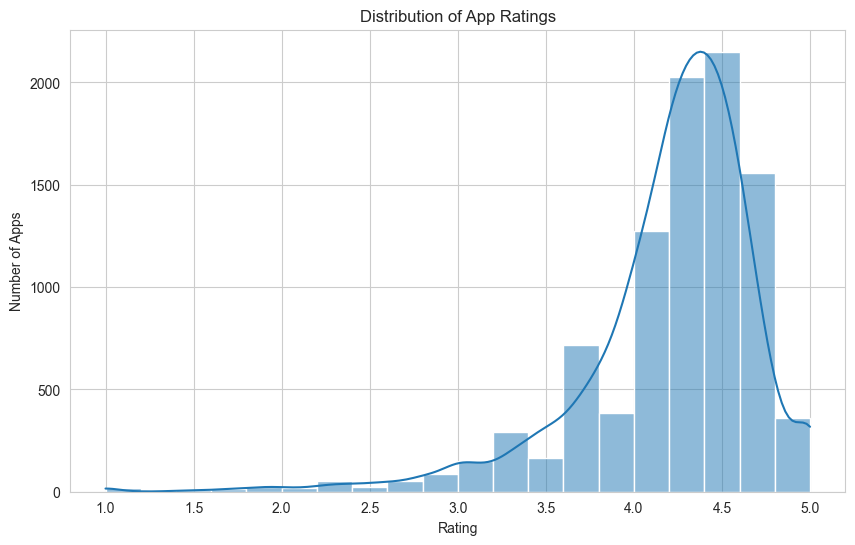

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')

# Create a histogram of the 'Rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show() # This command displays the plot

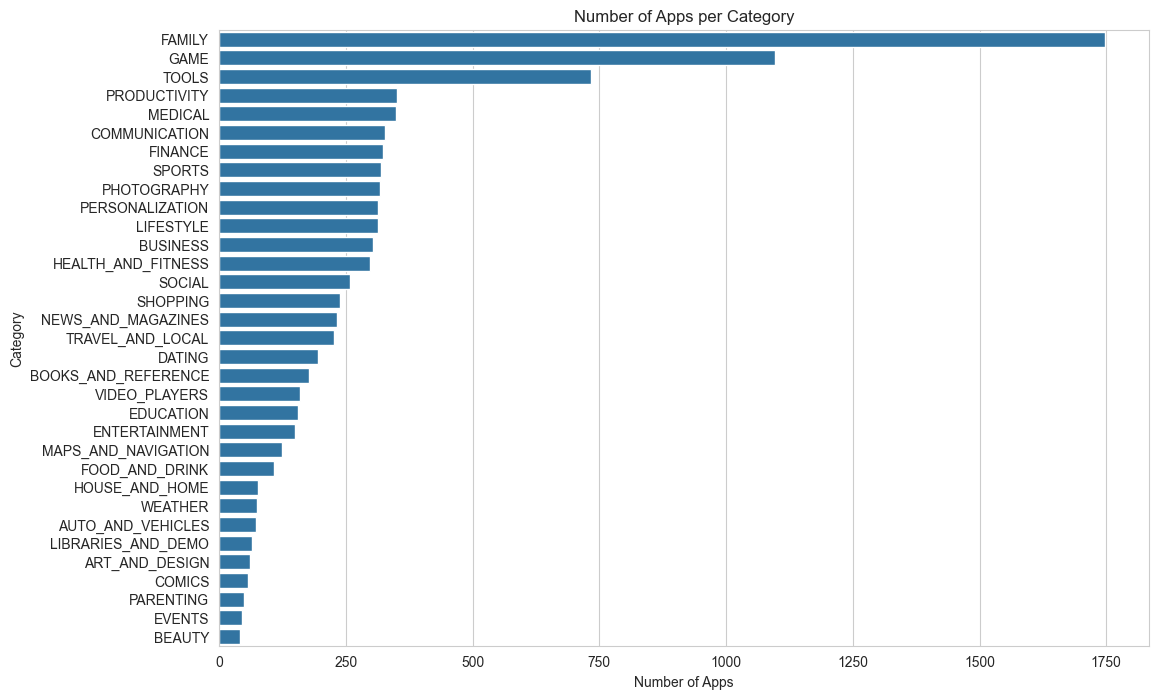

In [9]:
# Create a count plot for the 'Category' column
plt.figure(figsize=(12, 8))
# 'order' will sort the bars from most common to least common
sns.countplot(y=df['Category'], order = df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

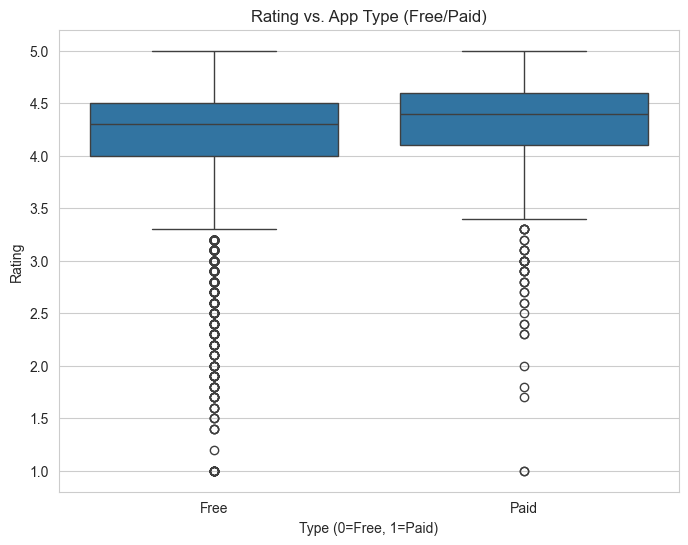

In [10]:
# Create a boxplot for 'Type' vs 'Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating vs. App Type (Free/Paid)')
plt.xlabel('Type (0=Free, 1=Paid)')
plt.ylabel('Rating')
plt.show()

In [11]:
# Map 'Free' to 0 and 'Paid' to 1
df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})

# Check the 'Type' column, it should now be 0s and 1s
print(df['Type'].value_counts())
print(df.head())

Type
0    8719
1     647
Name: count, dtype: int64
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159  19.0     10000     0    0.0       Everyone   
1     967  14.0    500000     0    0.0       Everyone   
2   87510   8.7   5000000     0    0.0       Everyone   
3  215644  25.0  50000000     0    0.0           Teen   
4     967   2.8    100000     0    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018         

In [12]:
# This one line creates new columns for every category and content rating
df = pd.get_dummies(df, columns=['Category', 'Content Rating'], drop_first=True)

# Check the dataframe again. You'll see many new columns!
print("\n--- AFTER ONE-HOT ENCODING ---")
print(df.head())

# Check .info() to see all the new columns
print(df.info())


--- AFTER ONE-HOT ENCODING ---
                                                 App  Rating Reviews  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1     159  19.0   
1                                Coloring book moana     3.9     967  14.0   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   87510   8.7   
3                              Sketch - Draw & Paint     4.5  215644  25.0   
4              Pixel Draw - Number Art Coloring Book     4.3     967   2.8   

   Installs  Type  Price                     Genres      Last Updated  \
0     10000     0    0.0               Art & Design   January 7, 2018   
1    500000     0    0.0  Art & Design;Pretend Play  January 15, 2018   
2   5000000     0    0.0               Art & Design    August 1, 2018   
3  50000000     0    0.0               Art & Design      June 8, 2018   
4    100000     0    0.0    Art & Design;Creativity     June 20, 2018   

          Current Ver  ... Category_SPORTS  Category_TOOLS  

In [13]:
# Our target
y = df['Rating']

# Our features
# We drop 'Rating' (it's our target) and any leftover text columns we didn't use.
X = df.drop(columns=['Rating', 'App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

print("--- Our Target (y) ---")
print(y.head())
print("\n--- Our Features (X) ---")
print(X.head())

--- Our Target (y) ---
0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

--- Our Features (X) ---
  Reviews  Size  Installs  Type  Price  Category_AUTO_AND_VEHICLES  \
0     159  19.0     10000     0    0.0                       False   
1     967  14.0    500000     0    0.0                       False   
2   87510   8.7   5000000     0    0.0                       False   
3  215644  25.0  50000000     0    0.0                       False   
4     967   2.8    100000     0    0.0                       False   

   Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0            False                         False              False   
1            False                         False              False   
2            False                         False              False   
3            False                         False              False   
4            False                         False              False   

   Category_COMICS  ...  Cate

In [17]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (7492, 42)
Testing features shape: (1874, 42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Create the model
# n_estimators=100 means it builds 100 "decision trees" to vote on the answer
# n_jobs=-1 uses all your computer's processors to speed it up
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the training data
print("\nTraining the model... (This might take a moment)")
model.fit(X_train, y_train)
print("Model trained!")

# 3. Make predictions on the unseen test data
predictions = model.predict(X_test)


Training the model... (This might take a moment)
Model trained!


In [19]:
# 4. Check how good the predictions are
mae = mean_absolute_error(y_test, predictions)

print(f"\nMean Absolute Error: {mae:.4f}")
print(f"This means our model's rating predictions are, on average, off by {mae:.4f} stars.")


Mean Absolute Error: 0.3096
This means our model's rating predictions are, on average, off by 0.3096 stars.


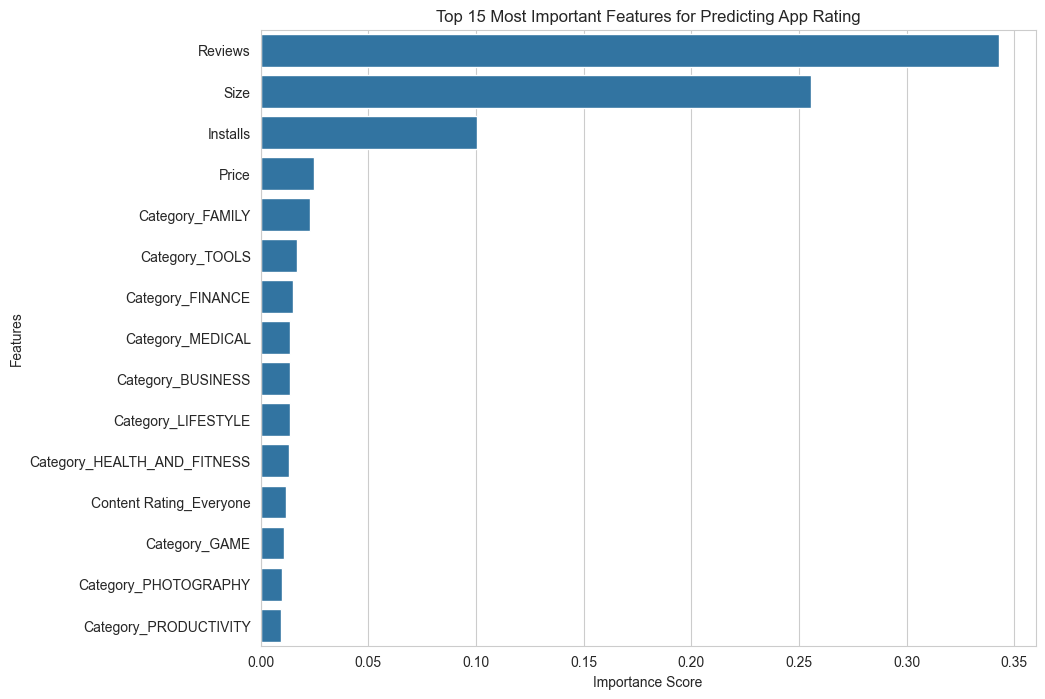

In [20]:
# 1. Get the feature importances from the trained model
importances = model.feature_importances_

# 2. Create a pandas Series to make it easy to see the names
# We use X.columns to get the names of all our feature columns
feature_series = pd.Series(importances, index=X.columns)

# 3. Sort them from most important to least important and get the top 15
top_15 = feature_series.sort_values(ascending=False).head(15)

# 4. Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15.values, y=top_15.index)
plt.title('Top 15 Most Important Features for Predicting App Rating')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()